In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Section 1

## Task 1: Setup and DataFrame Creation
- Install Pandas (if not already installed).
- Import Pandas and any other necessary libraries.
- Create a DataFrame from a dictionary and from a list of dictionaries.
- Load a dataset from a CSV file that is provide called messed_dataset.csv


In [322]:
# creating a dataframe using a dictionary
example_dictionary = {'Name':['Rakesh','Ram','Shyam'], 'Fruit':['grape','mango','orange']}
# creating dataframe from example_dictionary
df_dict = pd.DataFrame(example_dictionary, columns=['Name','Fruit'])
df_dict

,Name,Fruit
0,Rakesh,grape
1,Ram,mango
2,Shyam,orange


In [323]:
#creating a dataframe from a list of dictionary
list_of_dictionary = [{'Name':'Rakesh','Fruit':'Grape'},
                      {'Name':'Ram','Fruit':'Mango'},
                      {'Name':'Shyam','Fruit':'Orange'}]
df_dict_list = pd.DataFrame(list_of_dictionary)
df_dict_list

,Name,Fruit
0,Rakesh,Grape
1,Ram,Mango
2,Shyam,Orange


In [324]:
# Load the dataset and generate dataframe
df_messed = pd.read_csv('messed_dataset.csv')


## Task 2: Viewing and Inspecting Data
- Display the first and last few rows of the DataFrame.
- Get a summary of the DataFrame, including basic statistics and data types.
- Display the shape and column names of the DataFrame.


In [325]:
# display first few rows of the dataframe messes
df_messed.head(5)

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04
2,Jessica Reyes,34.0,NaN,NaN,60511.62,2022-05-24
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19


In [326]:
# display last few rows of the dataframe messes
df_messed.tail(5)

,Name,Age,Email,Country,Salary,DateOfJoining
95,Garrett Davidson,56.0,gjames@example.com,Solomon Islands,86227.88,NaN
96,Elizabeth Ross,52.0,richardlewis@example.net,Equatorial Guinea,29992.69,2020-04-08
97,NaN,72.0,brian50@example.com,Somalia,90628.22,2020-04-11
98,Patricia Singh,65.0,lramirez@example.org,Greece,85290.44,2020-03-18
99,Christopher Stokes,42.0,NaN,South Africa,20289.17,2021-09-23


In [327]:
# Generating a general information of dataframe
df_messed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


##### after using info() method on dataframe, we can see that

- There are six  columns
- all columns have data type as object
- Total number of rows is 100
- Looks like there is at least one null value in every columns since non of them have 100 non-null values

In [328]:
# getting summary statistics usind describe ()
df_messed.describe()

,Name,Age,Email,Country,Salary,DateOfJoining
count,89,97,80,86,94,79
unique,85,53,80,76,93,79
top,invalid,76.0,ycastro@example.org,Greece,invalid,2022-09-29
freq,5,6,1,2,2,1


##### some observation when describe() is used
- there is not mentioning about mean, median or statiscal inference. looks like all column dtype is not integer or float. lets check below

In [329]:
#cheking data types of all columns
df_messed.dtypes

Name             object
Age              object
Email            object
Country          object
Salary           object
DateOfJoining    object
dtype: object

In [330]:
# Checking columns name
df_messed.columns

Index(['Name', 'Age', 'Email', 'Country', 'Salary', 'DateOfJoining'], dtype='object')

In [331]:
#checking shape of the dataframe
df_messed.shape

(100, 6)

## Task 3: Selection and Indexing
- Select a single column and multiple columns.
- Select rows by index and by label.
- Select specific rows and columns using loc and iloc.



In [332]:
# selecting a single columns, example: Name
df_messed['Name'].head()

0              invalid
1      David Jefferson
2        Jessica Reyes
3    Kenneth Macdonald
4          Julie Horne
Name: Name, dtype: object

In [333]:
# selecting a multiple columns, example: Name and Age
df_messed[['Name','Age']].head()

,Name,Age
0,invalid,59.0
1,David Jefferson,21.0
2,Jessica Reyes,34.0
3,Kenneth Macdonald,68.0
4,Julie Horne,78.0


In [334]:
# selecting rows by index, exaple : first two rows
df_messed[:2]

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04


In [335]:
#selecting rows by index using iloc and all columns, example: first two rows
df_messed.iloc[:2,:]

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04


In [336]:
#selecting rows using label using loc
df_messed.loc[[0,1],:]

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04


In [337]:
# selecting specific rows and columns using loc , example second-third rows and second-third column
df_messed.loc[[1,2],['Age','Email']]

,Age,Email
1,21.0,NaN
2,34.0,NaN


In [338]:
# selecting specific rows and columns using iloc , example second-third rows and second-third column
df_messed.iloc[1:3,1:3]

,Age,Email
1,21.0,NaN
2,34.0,NaN


## Task 4: Handling Missing Data
- Identify missing values in the DataFrame
- Drop rows with missing values.
- Fill missing values with a specified value.


In [339]:
# identifying missing value in the dataframe columns
df_messed.isna().sum()

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
dtype: int64

In [340]:
a = df_messed['Name'].isnull().sum()
print(type(a))

<class 'numpy.int64'>


In [341]:

# dropping missing value in dataframe, lets drop rows for columns whose nan value is greater than 10
columnn_list = df_messed.columns
for column in columnn_list:
    if df_messed[column].isna().sum() > 10:
        df_messed.dropna(subset=[column], inplace=True)

print(df_messed.isna().sum())


Name             0
Age              2
Email            0
Country          4
Salary           2
DateOfJoining    0
dtype: int64


In [342]:
# now droping fill with 0 for all other columns
df_messed.fillna(0, inplace=True)

In [343]:
#checking if we still have null value
df_messed.isna().sum()

Name             0
Age              0
Email            0
Country          0
Salary           0
DateOfJoining    0
dtype: int64

## Task 5: Data Operations
- Add a new column to the DataFrame.
- Delete a column from the DataFrame.
- Rename columns in the DataFrame.
- Apply a function to a column.


In [344]:
df_messed['Salary'][0].replace('.','').isdigit()

True

In [345]:
# adding new column to the dataframe, example: salary_in_float
def change_to_float(x):
    if type(x) == str:
        a = x.replace('.','')
        if a.isdigit():
            x = float(x)
            return x
    else:
        x = None
        return x

    

df_messed['Salary_in_float'] = df_messed['Salary'].apply(change_to_float)

In [346]:
df_messed['Salary_in_float'].isna().sum()

4

In [347]:
# creatin a new column -- Salary_percentage
df_messed['Salary_percentage'] = (df_messed['Salary_in_float'] * 100 ) / df_messed['Salary_in_float'].sum()



In [348]:
#dropping column -- salary percentage
df_messed.drop(columns=['Salary_percentage'], inplace=True)

In [349]:
df_messed.head()

,Name,Age,Email,Country,Salary,DateOfJoining,Salary_in_float
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,44694.24
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,84223.29
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,25660.99
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,58550.56
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,20175.11


In [350]:
#renaming a column
df_messed.rename({'Salary_in_float':'Salary_Float'}, inplace=True)

In [351]:
df_messed.head()

,Name,Age,Email,Country,Salary,DateOfJoining,Salary_in_float
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,44694.24
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,84223.29
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,25660.99
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,58550.56
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,20175.11


## Task 6: GroupBy Operation
- Group the DataFrame by a column and calculate summary statistics
- Iterate over groups and display the group names and data.

In [352]:
# grouping a dataframe by column and calculate summary statistics -- grouping by country
group_1_df = df_messed.groupby('Country').agg({'Salary_in_float':['mean','sum','max','min','count']})



In [353]:
group_1_df.index

Index([                                                    0,
                                                   'Albania',
                                                   'Armenia',
                                                   'Bahamas',
                                                   'Bahrain',
                                    'Bosnia and Herzegovina',
       'British Indian Ocean Territory (Chagos Archipelago)',
                                              'Burkina Faso',
                                                   'Burundi',
                                                  'Cambodia',
                                                  'Cameroon',
                                                'Cape Verde',
                                  'Central African Republic',
                                                  'Colombia',
                                                     'Congo',
                                            'Czech Republic',
        

In [354]:
# another method
pd.pivot_table(df_messed, 
                          values='Salary_in_float', 
                          index='Country', 
                          aggfunc={'Salary_in_float': [np.mean, np.sum]})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6196\1241762241.py:2: FutureWarning: The provided callable <function mean at 0x000001E7D79FA3E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df_messed,
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6196\1241762241.py:2: FutureWarning: The provided callable <function sum at 0x000001E7D79F9300> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.pivot_table(df_messed,


,mean,sum
Country,,
0,56048.50,224194.00
Albania,NaN,0.00
Armenia,57795.75,57795.75
Bahamas,78048.75,78048.75
Bahrain,83514.58,83514.58
Bosnia and Herzegovina,35390.77,35390.77
British Indian Ocean Territory (Chagos Archipelago),25219.60,25219.60
Burkina Faso,81661.97,81661.97
Burundi,NaN,0.00


In [355]:
# iterating over groups and display group name and data
for group_name in group_1_df.index:
    print(f"Group name: {group_name}")
    print(f"Group data:\n{group_1_df.loc[group_name]}\n")

Group name: 0
Group data:
Salary_in_float  mean      56048.50
                 sum      224194.00
                 max       96746.83
                 min       28874.43
                 count         4.00
Name: 0, dtype: float64

Group name: Albania
Group data:
Salary_in_float  mean     NaN
                 sum      0.0
                 max      NaN
                 min      NaN
                 count    0.0
Name: Albania, dtype: float64

Group name: Armenia
Group data:
Salary_in_float  mean     57795.75
                 sum      57795.75
                 max      57795.75
                 min      57795.75
                 count        1.00
Name: Armenia, dtype: float64

Group name: Bahamas
Group data:
Salary_in_float  mean     78048.75
                 sum      78048.75
                 max      78048.75
                 min      78048.75
                 count        1.00
Name: Bahamas, dtype: float64

Group name: Bahrain
Group data:
Salary_in_float  mean     83514.58
             

## Task 7: Merging and Joining DataFrames
- Merge two DataFrames on a common column.
- Join two DataFrames using their indices.


In [356]:
# lets first create a copy of above df with less data
df_messed_half = df_messed.iloc[:len(df_messed)//2]
df_messed_half.head()

,Name,Age,Email,Country,Salary,DateOfJoining,Salary_in_float
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,44694.24
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,84223.29
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,25660.99
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,58550.56
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,20175.11


In [357]:
# now merging both on age
new_merge = df_messed.merge(df_messed_half, how='inner', on='Country')
new_merge.head()


,Name_x,Age_x,Email_x,Country,Salary_x,DateOfJoining_x,Salary_in_float_x,Name_y,Age_y,Email_y,Salary_y,DateOfJoining_y,Salary_in_float_y
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,44694.24,invalid,59.0,ycastro@example.org,44694.24,2022-09-29,44694.24
1,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,84223.29,Kenneth Macdonald,68.0,ewolf@example.com,84223.29,2022-04-07,84223.29
2,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,25660.99,Jonathan Holland,26.0,mayercaitlin@example.org,25660.99,2023-05-01,25660.99
3,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,58550.56,Kimberly Roberts,76.0,lmiller@example.org,58550.56,2023-07-08,58550.56
4,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,20175.11,Jason Perez,59.0,collinsedward@example.com,20175.11,2024-04-11,20175.11


In [358]:
# joining dataframe
df_joined = df_messed.join(df_messed_half,lsuffix='_df1', rsuffix='_df2')
df_joined.head()

,Name_df1,Age_df1,Email_df1,Country_df1,Salary_df1,DateOfJoining_df1,Salary_in_float_df1,Name_df2,Age_df2,Email_df2,Country_df2,Salary_df2,DateOfJoining_df2,Salary_in_float_df2
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,44694.24,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,44694.24
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,84223.29,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,84223.29
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,25660.99,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,25660.99
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,58550.56,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,58550.56
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,20175.11,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,20175.11


## Task 8: Working with Dates and Times
- Create a datetime index for the DataFrame.
- Convert a column to datetime and extract date components.



In [359]:
df_messed.columns

Index(['Name', 'Age', 'Email', 'Country', 'Salary', 'DateOfJoining',
       'Salary_in_float'],
      dtype='object')

In [360]:
# converting date data type to datetime
df_messed['DateOfJoining'] = pd.to_datetime(df_messed['DateOfJoining'], errors='coerce')


In [364]:
#extracting date components from datetime object
df_messed['Year'] = df_messed['DateOfJoining'].dt.year
df_messed['Month'] = df_messed['DateOfJoining'].dt.month
df_messed['Day'] = df_messed['DateOfJoining'].dt.day
df_messed['DayOfWeek'] = df_messed['DateOfJoining'].dt.dayofweek

In [365]:
df_messed.head()

,Name,Age,Email,Country,Salary,DateOfJoining,Salary_in_float,Year,Month,Day,DayOfWeek
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,44694.24,2022.0,9.0,29.0,3.0
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,84223.29,2022.0,4.0,7.0,3.0
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01,25660.99,2023.0,5.0,1.0,0.0
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08,58550.56,2023.0,7.0,8.0,5.0
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11,20175.11,2024.0,4.0,11.0,3.0


In [366]:
#change datetime object to index of dataframe
df_messed.set_index('DateOfJoining', inplace=True)


In [367]:
df_messed.head()

,Name,Age,Email,Country,Salary,Salary_in_float,Year,Month,Day,DayOfWeek
DateOfJoining,,,,,,,,,,
2022-09-29,invalid,59.0,ycastro@example.org,Switzerland,44694.24,44694.24,2022.0,9.0,29.0,3.0
2022-04-07,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,84223.29,2022.0,4.0,7.0,3.0
2023-05-01,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,25660.99,2023.0,5.0,1.0,0.0
2023-07-08,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,58550.56,2023.0,7.0,8.0,5.0
2024-04-11,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,20175.11,2024.0,4.0,11.0,3.0


## Task 9 : Input and Output
- Read data from a CSV file into a DataFrame.
- Write the DataFrame to a CSV file.
- Read data from an Excel file into a DataFrame. The data given is SaleData.xlsl.
- Write the DataFrame to an Excel file.


In [368]:
# reading fromcsv file to dataframe
df_from_csv = pd.read_csv('messed_dataset.csv')
df_from_csv.head(2)

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04


In [369]:
# writing a df to csv
df_from_csv.to_csv('new_csv.csv')

In [371]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 325.1 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.9 kB 409.6 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/250.9 kB 599.1 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 778.2 kB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 853.4 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [372]:
# reading from excel file - SalesData.xlsx
df_from_excel = pd.read_excel('SaleData.xlsx')
df_from_excel.head(2)

,OrderDate,Region,Manager,SalesMan,Item,Units,Unit_price,Sale_amt
0,2018-01-06,East,Martha,Alexander,Television,95.0,1198.0,113810.0
1,2018-01-23,Central,Hermann,Shelli,Home Theater,50.0,500.0,25000.0


In [373]:
#writing df to excel
df_from_excel.to_excel('new_excel.xlsx')

# Section 2: Reference to Friday Class on EDA


## Task 10: Visualization
- Create a simple plot using Matplotlib.
- Create a bar plot using Seaborn.


In [379]:
group_1_df.head(2)

Salary_in_float                                    
                   mean       sum       max       min count
Country                                                    
0               56048.5  224194.0  96746.83  28874.43     4
Albania             NaN       0.0       NaN       NaN     0

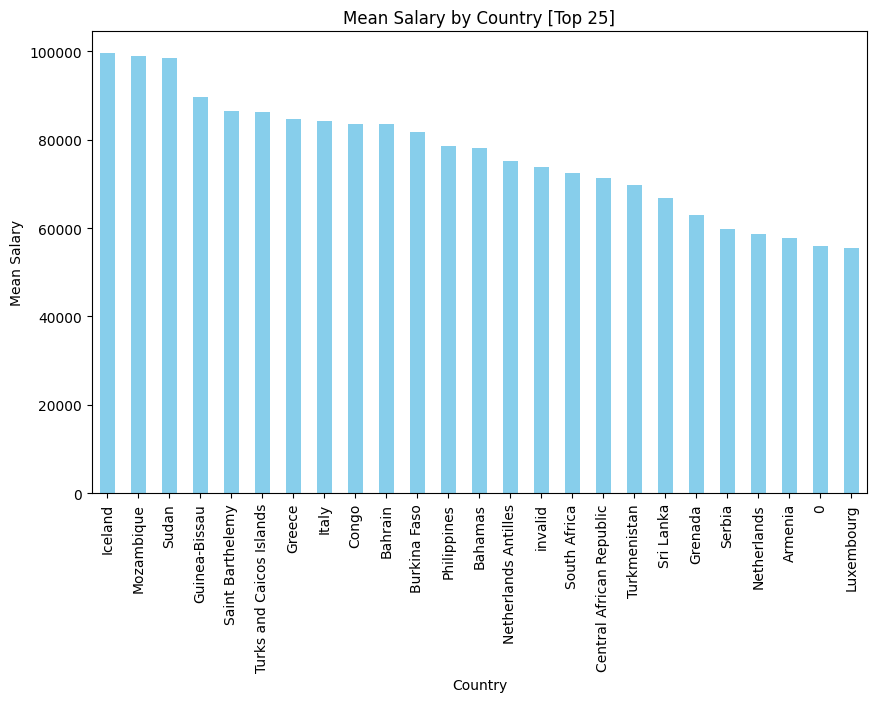

In [395]:
# creating a simple plot using matplotlib -- Top 25 country with highest mean sales

plt.figure(figsize=(10,6))

mean_salary_by_country = group_1_df[('Salary_in_float', 'mean')]
mean_salary_by_country.sort_values(ascending=False)[:25].plot(kind='bar', color='skyblue')
plt.title('Mean Salary by Country [Top 25]')
plt.xlabel('Country')
plt.ylabel('Mean Salary')


plt.show()


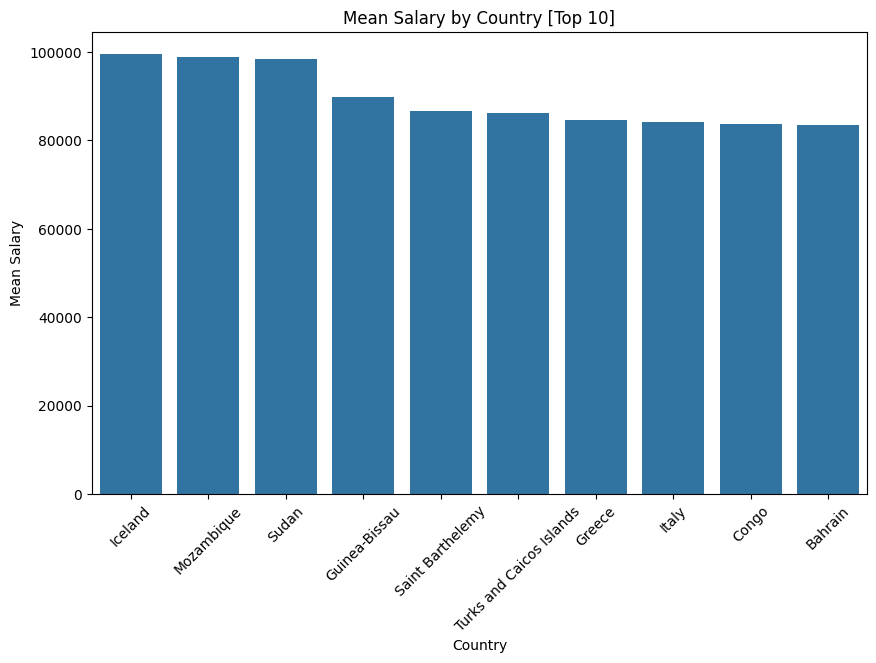

In [399]:
# plotting using seaborn
plt.figure(figsize=(10, 6))
df_sorted = group_1_df.sort_values(by=('Salary_in_float', 'mean'), ascending=False)
sns.barplot(x=df_sorted.index[:10], y=df_sorted[('Salary_in_float', 'mean')][:10])

plt.title('Mean Salary by Country [Top 10]')
plt.xlabel('Country')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)
plt.show()